In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [4]:
df = pd.read_csv('data_analysis.csv')

# choose relevant columns 
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'excel_yn', 'python_excel', 'spark', 'aws', 'job_simp',
       'seniority', 'desc_len', 'num_competitors'],
      dtype='object')

In [6]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_competitors','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel_yn','job_simp','seniority','desc_len']]


In [7]:
df_dum = pd.get_dummies(df_model)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
import statsmodels.api as sm

C:\Users\Sohum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [12]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.18
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.79e-94
Time:                        23:10:03   Log-Likelihood:                -3310.3
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     598   BIC:                             7572.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.3427      6.764      6.408      0.000      30.059      56.626
Rating                                                3.5792      1.935      1.849      0.065      -0.222       7.380
num_competitors                                       2.1826      0.869      2.513      0.012       0.477       3.888
hourly                                              -33.7765      9.360     -3.608      0.000     -52.160     -15.393
employer_provided                                    31.7070     11.515      2.753      0.006       9.091      54.323
same_state                                            2.4498      2.616      0.936      0.349      -2.688       7.588
age                                                   0.0317      0.030      1.053      0.293      -0.027       0.091
python_yn                                             7.7903      2.532      3.076      0.002       2.817      12.763
spark                                                -0.5092      2.918     -0.175      0.862      -6.240       5.221
aws                                                   0.8682      2.739      0.317      0.751      -4.510       6.247
excel_yn                                             -0.4923      2.266     -0.217      0.828      -4.943       3.959
desc_len                                          -8.362e-05      0.001     -0.110      0.913      -0.002       0.001
Size_-1                                              14.5218      8.648      1.679      0.094      -2.463      31.506
Size_1 to 50 employees                                1.3467      6.500      0.207      0.836     -11.418      14.112
Size_10000+ employees                                -2.1260      5.821     -0.365      0.715     -13.559       9.307
Size_1001 to 5000 employees                           6.1704      3.874      1.593      0.112      -1.437      13.778
Size_201 to 500 employees                             2.5776      3.879      0.664      0.507      -5.041      10.196
Size_5001 to 10000 employees                         -3.0832      5.468     -0.564      0.573     -13.821       7.655
Size_501 to 1000 employees                            2.3436      4.060      0.577      0.564      -5.629      10.317
Size_51 to 200 employees                              4.2050      4.419      0.952      0.342      -4.473      12.884
Size_Unknown                                         17.3866     14.173      1.227      0.220     -10.449      45.222
Type of ownership_-1                                 14.5218      8.648      1.679      0.094      -2.463      31.506
Type of ownership_College / University                6.0976     17.723      0.344      0.731     -28.708      40.904
Type of ownersh

In [13]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.715372532125468

In [14]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.246742424551424

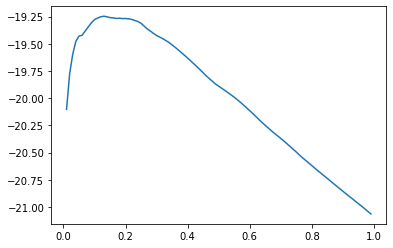

In [16]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
plt.plot(alpha,error)


In [17]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-19.246742


In [18]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

C:\Users\Sohum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sohum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sohum\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-15.280748260951306

In [19]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_


C:\Users\Sohum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [20]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)

18.789154169829068

In [24]:
mean_absolute_error(y_test,tpred_lml)

19.660845313866897

In [25]:
mean_absolute_error(y_test,tpred_rf)

11.330973154362416

In [26]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

14.32162761744355

In [22]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 34.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
